# Time to work on Time Series Data


## Abstract

This notebook has been created to explore time series forecasting on NVIDIA Stock price Dataset extracted using Yahoo Finance API. We shall demonstrate various preprocessing methods like resampling, smoothing, detrending and deserialization, etc. Through these methods, we can understand the fluctuations in the data and also split the data based on time periods.

Part 1 of this notebook revolves around information about time series forecasting, working on preprocessing the data and performing EDA on the dataset. <br>
Part 2 will focus on implementing various time series forecasting models like ARIMA, SARIMAX, Prophet, etc


## Theoretical Concepts

<b>What is time series data and forecasting? </b> <br>
Time-series data is a sequence of data points indexed in time order, typically collected at successive, equally-spaced points in time. 
Time series forecasting is the process of predicting future values based on previously observed data points, collected over time at regular intervals. It involves analyzing patterns such as trends, seasonality, and cycles in the historical data to project future trends.


<b>Why is time series forecasting important?</b> <br>
Time series forecasting allows us to capture temporal dependencies and trends that are often critical for making accurate predictions and informed decisions. Time series forecasting can be used in various industries like sales, engineering, finance, etc where forecasting future events is necessary.<br>
With time series analysis, we can discover trends in past data and use them to explain the underlying patterns in the data. 
Time series analysis is a basic tool for the analysis of natural systems, which cannot be understood without it. For example, fluctuations in the stock market, forecasting sales of products are examples of natural systems, whose behavior can best be studied using time series analysis. <br>
Time series analysis gives a way to predict the future. It is essential in engineering, finance, business, and the economy to make it easy for investors, customers, or engineers to make the proper decisions.



<ul><b>Time series components</b>
    <li>Trends</li>
    <li>Seasonality</li>
    <li>Cyclicity</li>
    <li>Irregularity</li>
    </ul>

1. Trend component: This is useful in predicting future movements. Over a long period of time, the trend shows whether the data tends to increase decrease, or stabilize.

2. Seasonal component: The seasonal component of a time series is the variation in some variable due to some predetermined patterns in its behavior. 

3. Cyclical component: The cyclical component in a time series is the part of the movement in the variable which can be explained by other cyclical movements in the economy. This components detects if there is a repetition or a pattern which can be noticed in the time series. This pattern can be used to predict the data or values for a certain time period.

4. Irregularity component: The irregular component is the part of the movement in the variable which cannot be explained by cyclical movements in the economy. In other words, this term gives information about non-seasonal patterns like sudden spikes or fluctuations in the data due to an intermittent reason.




## Problem Statement:
You have been given a dataset containing historical stock market data with various attributes such as date, highest and lowest stock prices, opening and closing prices, trading volume, and adjusted closing prices. Your goal is to perform a comprehensive time series analysis on this dataset and use the historical data to predict the closing stock prices for a specific period.

#### Input:

The dataset has been created by extracting the historical stock market data on the for NVIDIA (NYSE:NVDA) for the past 10 years using the Yahoo Finance API. The API returns a Pandas dataframe of the requested data. The dataframe consists of the following fields:

Date: The date of the recorded data.
High: The highest stock price during the trading day.
Low: The lowest stock price during the trading day.
Open: The opening stock price at the beginning of the trading day.
Close: The closing stock price at the end of the trading day.
Adj Close: The adjusted closing price, which accounts for corporate actions like dividends and stock splits.
Volume: The number of shares traded on that day.

#### Example Input Data:

<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Date</th>
      <th>Open</th>
      <th>High</th>
      <th>Low</th>
      <th>Close</th>
      <th>Adj Close</th>
      <th>Volume</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2014-10-20</td>
      <td>0.43550</td>
      <td>0.44325</td>
      <td>0.43250</td>
      <td>0.43925</td>
      <td>0.419952</td>
      <td>200336000</td>
    </tr>
    <tr>
      <td>2014-10-21</td>
      <td>0.44250</td>
      <td>0.45850</td>
      <td>0.44125</td>
      <td>0.45800</td>
      <td>0.437879</td>
      <td>351092000</td>
    </tr>
    <tr>
      <td>2014-10-22</td>
      <td>0.45725</td>
      <td>0.45875</td>
      <td>0.44725</td>
      <td>0.44725</td>
      <td>0.427601</td>
      <td>239512000</td>
    </tr>
  </tbody>
</table>



#### Output:

The output will be a list of predicted closing stock prices for the specific period as per the analysis.

predicted_closing_prices = [predicted_price_1, predicted_price_2, ..., predicted_price_n]


#### Example Output:

predicted_closing_prices = [135.34, 137.12, ..., 141.54]  # Example predicted closing prices for the next 10 days



#### Problem Details:

In this problem, you are expected to follow these steps:

Data Loading: Load the historical stock market data from the API into a pandas DataFrame for analysis.

Data Preprocessing: Convert the 'Date' column to datetime format, handle missing values, and explore the dataset to understand its structure.

Exploratory Data Analysis (EDA): Analyze trends and patterns in the historical stock prices. Visualize the data to identify any underlying patterns or anomalies.

Feature Engineering: Create relevant features such as moving averages, price volatility indicators, and trading volume trends to enhance the dataset for modeling.

Model Selection: Choose various open-source time series forecasting models like ARIMA, LSTM and Prophet to compare their performances and shortcomings.

Model Training: Train the selected model using the preprocessed data, allowing the model to learn patterns and relationships in the historical stock prices.

Prediction: Use the trained model to predict the closing stock prices for the specific period. Evaluate the model's predictions and refine the model if necessary.


## Theoretical Implementation

Step 1: As indicated above, the input data contains columsn date, low, high, open, close, adj. close and volume,
In accordance with the problem statement, we are interested only with the date, the closing stock price and the volume of the shares transacted.
So, the unwanted columns can be <b>dropped</b>. Then, the data can be <b>split</b> into training and testing dataset for model training and evaluation respectively.<br>

Step 2: We <b>describe</b> the data to check the mean, standard deviation and the count of records in the data. This helps us understand how distributed the data as. We do not expect a sparse distribution as time series data do not contain frequent fluctuations. <br>

Step 3: Further, we start <b>exploratory data analysis</b> and plot the moving average for last 5 days, 30 days and 90 days to visualize the trend in the data over the chosen time period. To extract deeper insights, we can perform feature engineering or create new columns if required.<br>

Step 4: We then implement models like ARIMA, LSTM and Prophet to check the performance of the models. Based on the accuracy and performance, we can understand the shortcomings of the models

## Data Preprocessing

The data has been extracted through Yahoo Finance API. Hence, the data is expected to be clean and not contain missing values.
Hence, we shall check the columns and select only the ones that we require.

In [38]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


C:\Users\visho\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\visho\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\visho\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [39]:
import numpy as np
import yfinance as yf #Yahoo Finance API
import pandas as pd # Pandas for data preprocessing
import matplotlib.pyplot as plt # matplotlib for plotting and visualization
import seaborn as sns
from datetime import datetime

In [40]:
ticker_symbol = "NVDA"
end_date = datetime.now()
start_date = end_date.replace(year=end_date.year - 10)

In [41]:
nvda_df = yf.download(ticker_symbol, start = start_date,end=end_date )

[*********************100%***********************]  1 of 1 completed


In [42]:
nvda_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-21,0.44250,0.45850,0.44125,0.45800,0.437879,351092000
2014-10-22,0.45725,0.45875,0.44725,0.44725,0.427601,239512000
2014-10-23,0.45500,0.46050,0.45175,0.45725,0.437162,214476000
2014-10-24,0.46000,0.46475,0.45725,0.46200,0.441703,210156000
2014-10-27,0.46175,0.46400,0.45675,0.46225,0.441942,145092000


In [43]:
nvda_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,18.045812,18.383342,17.682197,18.049929,18.021104,4.677787e+08
std,27.627195,28.156233,27.019165,27.611811,27.617490,2.536388e+08
min,0.442500,0.458500,0.441250,0.447250,0.427601,4.564400e+07
25%,2.770875,2.796688,2.708875,2.764375,2.726653,3.065810e+08
50%,6.246250,6.324875,6.168250,6.233250,6.178546,4.153735e+08
75%,19.693250,20.040000,19.264000,19.707250,19.670872,5.640210e+08
max,139.800003,140.889999,137.279999,138.070007,138.070007,3.692928e+09


## Data Analysis

Now that we took a glimpse of the data, we shall further explore it to understand the distribution of the numerical values.


Data Preprocessing

In [44]:
nvda_copy = nvda_df.copy()  # Create a copy of the original DataFrame

# Convert 'Date' column to datetime object in the copied DataFrame
nvda_copy.reset_index(inplace=True)
nvda_copy['Date'] = pd.to_datetime(nvda_copy['Date'])

# Handle missing values (if any) in the copied DataFrame
nvda_copy.dropna(inplace=True)

# Split the copied dataset into training and testing sets
train_size = int(0.8 * len(nvda_copy))
train_data = nvda_copy[:train_size]
test_data = nvda_copy[train_size:]

In [54]:
nvda_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-21,0.44250,0.45850,0.44125,0.45800,0.437879,351092000
1,2014-10-22,0.45725,0.45875,0.44725,0.44725,0.427601,239512000
2,2014-10-23,0.45500,0.46050,0.45175,0.45725,0.437162,214476000
3,2014-10-24,0.46000,0.46475,0.45725,0.46200,0.441703,210156000
4,2014-10-27,0.46175,0.46400,0.45675,0.46225,0.441942,145092000


Resampling

In [47]:
monthly_data = nvda_df.resample('M').mean()
#df shoudl have a datetime index and  avalue column. THe dataframe is resampled to monthly frequency
monthly_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-31,0.461750,0.468222,0.457500,0.465111,0.444677,2.164249e+08
2014-11-30,0.502513,0.507289,0.496882,0.503474,0.482120,2.443735e+08
2014-12-31,0.512318,0.517114,0.506068,0.510580,0.490214,1.935002e+08
2015-01-31,0.497750,0.503338,0.490312,0.496150,0.476360,2.070176e+08
2015-02-28,0.534079,0.539237,0.529355,0.536079,0.515128,2.207126e+08
...,...,...,...,...,...,...
2024-06-30,124.546106,126.919368,121.756738,124.589105,124.575347,3.917126e+08
2024-07-31,122.805000,124.889545,119.531364,121.912727,121.902300,2.911563e+08
2024-08-31,116.824545,119.981365,113.578637,117.121818,117.111800,3.684258e+08


Smoothing Techniques

In [55]:
#SImple moving Averge with a window of 7 periods
nvda_copy['SMA_7'] = nvda_copy['Close'].rolling(window=7).mean()
nvda_copy

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_7
0,2014-10-21,0.442500,0.458500,0.441250,0.458000,0.437879,351092000,NaN
1,2014-10-22,0.457250,0.458750,0.447250,0.447250,0.427601,239512000,NaN
2,2014-10-23,0.455000,0.460500,0.451750,0.457250,0.437162,214476000,NaN
3,2014-10-24,0.460000,0.464750,0.457250,0.462000,0.441703,210156000,NaN
4,2014-10-27,0.461750,0.464000,0.456750,0.462250,0.441942,145092000,NaN
...,...,...,...,...,...,...,...,...
2511,2024-10-14,136.470001,139.600006,136.300003,138.070007,138.070007,232347700,132.265714
2512,2024-10-15,137.869995,138.570007,128.740005,131.600006,131.600006,377831000,133.220001
2513,2024-10-16,133.979996,136.619995,131.580002,135.720001,135.720001,264879700,134.362858
2514,2024-10-17,139.339996,140.889999,136.869995,136.929993,136.929993,306435900,134.940000


In [60]:
nvda_copy.drop(['SMA_7'],inplace=True,axis=1)

In [62]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(nvda_copy['Close'])
results = model.fit(smoothing_level = 0.3)
nvda_copy['EMA'] = results.fittedvalues
nvda_copy.head()


C:\Users\visho\anaconda3\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,Date,Open,High,Low,Close,Adj Close,Volume,EMA
0,2014-10-21,0.44250,0.45850,0.44125,0.45800,0.437879,351092000,0.458000
1,2014-10-22,0.45725,0.45875,0.44725,0.44725,0.427601,239512000,0.458000
2,2014-10-23,0.45500,0.46050,0.45175,0.45725,0.437162,214476000,0.454775
3,2014-10-24,0.46000,0.46475,0.45725,0.46200,0.441703,210156000,0.455518
4,2014-10-27,0.46175,0.46400,0.45675,0.46225,0.441942,145092000,0.457462


In [63]:
nvda_copy.drop(['EMA'],inplace=True,axis=1)

Feature Selection using correlation matrix

In [65]:
correlation_matrix = nvda_copy.corr(numeric_only=True)
relevant_features = correlation_matrix['Close'].sort_values(ascending=False).index[1:4]
selected_features = nvda_copy[relevant_features]
relevant_features

Index(['Adj Close', 'Low', 'High'], dtype='object')

Time Series Analysis and Feature Engineering

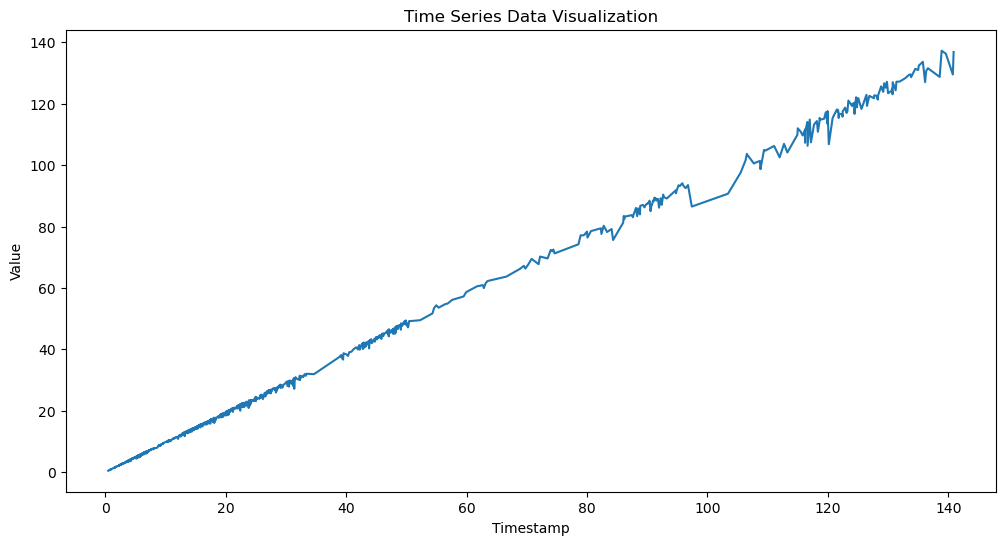

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='High', y='Low', data=nvda_copy)
plt.title('Time Series Data Visualization')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

Seasonal Decomposition - Allows you to break down the time series into its trends, seasonal and residual components. This can help in understanding recurring patterns and trends in the data

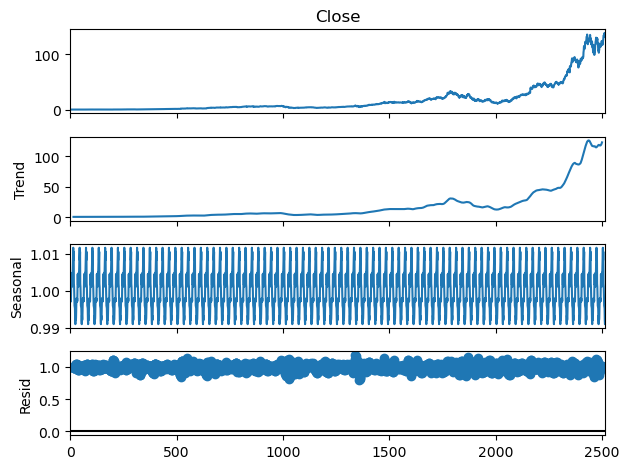

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(nvda_copy['Close'], model='multiplicative', period=30)
result.plot()
plt.show()

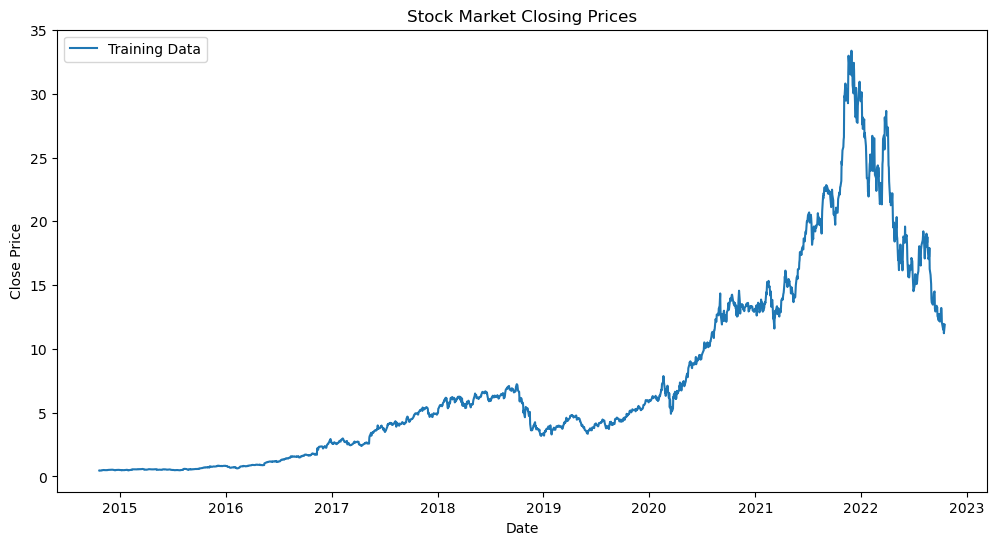

In [26]:
# Visualize time series data

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Training Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Market Closing Prices')
plt.legend()
plt.show()


Autocorrelation and partial autocorrelation plot: Helps identify the relationship between a time series and its lagged values

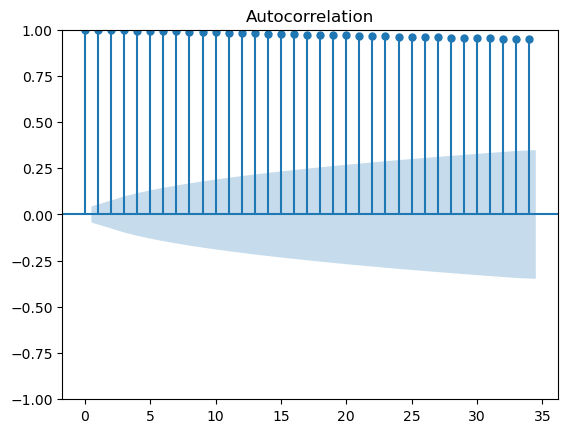

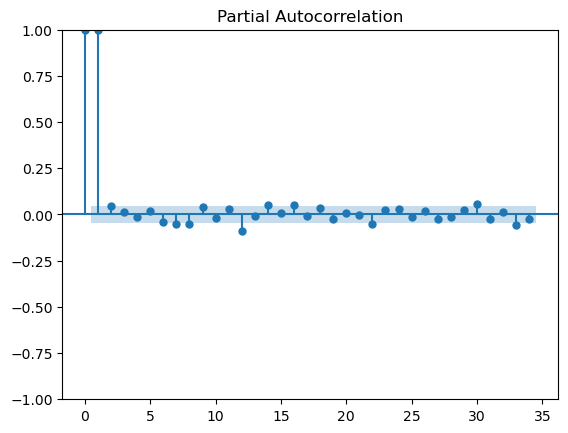

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot
plot_acf(train_data['Close'])
plt.show()

# Partial autocorrelation plot
plot_pacf(train_data['Close'])
plt.show()


In [29]:
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA

# Choose ARIMA as the forecasting model
model = ARIMA(train_data['Close'], order=(5, 1, 0))  # Example order (p, d, q)
model_fit = model.fit()

# Make predictions
forecast_steps = len(test_data)
predictions = model_fit.get_forecast(steps=forecast_steps)

# Create a proper datetime index for the predictions
prediction_index = pd.date_range(start=test_data['Date'].iloc[0], periods=forecast_steps, freq='B')

# Attach the predictions to the index
predictions.index = prediction_index

# Print or use the predictions as needed
print(predictions)

# Restore warnings to default behavior if needed
warnings.filterwarnings("default")



In [66]:
# Make predictions using the model
predictions = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data['Close'], predictions)
rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))

### Proof of correctness

Model performance Evaluation

In [67]:
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 47.86841605105676
Root Mean Squared Error: 60.81240410414785


Comparative Analysis

In [68]:
# Baseline model: Predicting next day's price as today's price
baseline_predictions = test_data['Close'].shift(-1).dropna()
baseline_mae = mean_absolute_error(test_data['Close'][:-1], baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(test_data['Close'][:-1], baseline_predictions))
print(f'Baseline Model MAE: {baseline_mae}')
print(f'Baseline Model RMSE: {baseline_rmse}')


Baseline Model MAE: 1.475079631236628
Baseline Model RMSE: 2.395910865334919


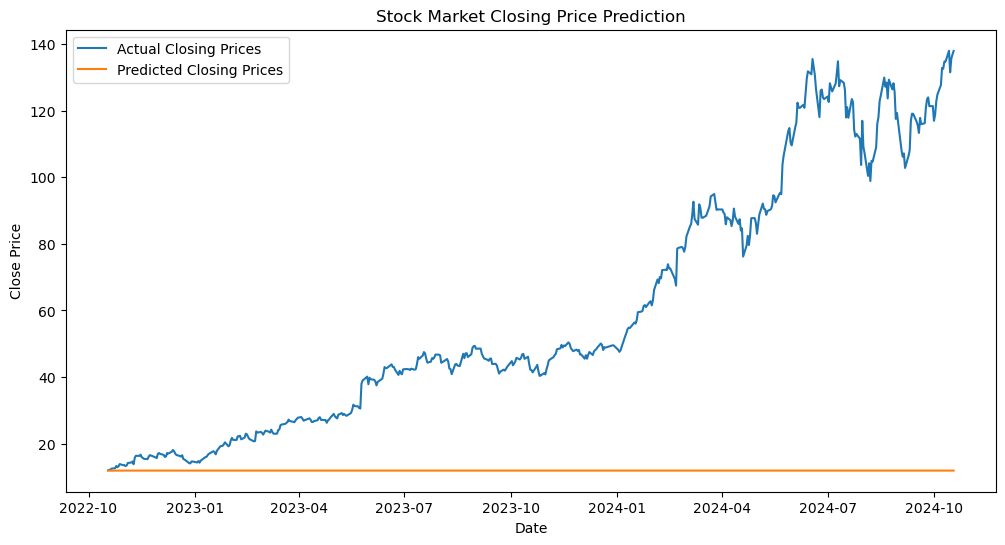

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Closing Prices')
plt.plot(test_data['Date'], predictions, label='Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Market Closing Price Prediction')
plt.legend()
plt.show()


In [72]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-21,0.44250,0.45850,0.44125,0.45800,0.437879,351092000
1,2014-10-22,0.45725,0.45875,0.44725,0.44725,0.427601,239512000
2,2014-10-23,0.45500,0.46050,0.45175,0.45725,0.437162,214476000
3,2014-10-24,0.46000,0.46475,0.45725,0.46200,0.441703,210156000
4,2014-10-27,0.46175,0.46400,0.45675,0.46225,0.441942,145092000


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Determine p and q using ACF and PACF plots
lag_acf = acf(data['High'], nlags=20)
lag_pacf = pacf(data['High'], nlags=20, method='ols')



# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['High'], ax=plt.gca(), lags=20)

# Plot PACF
plt.subplot(122)
plot_pacf(data['High'], ax=plt.gca(), lags=20)

plt.show()

7. Code Implementation:

Clear and well-documented code that is easy to follow
Efficient and optimized code with explanations for each step
Use of appropriate libraries and frameworks relevant to the problem
Ensure code is error-free and includes necessary exception handling.

8. Conclusion:

Summary of key findings
Reflection on the effectiveness of the approach
Suggestions for potential improvements or future work


9. References & License:

Accurate and relevant citations of sources used
Clearly state the license under which the code and data are shared

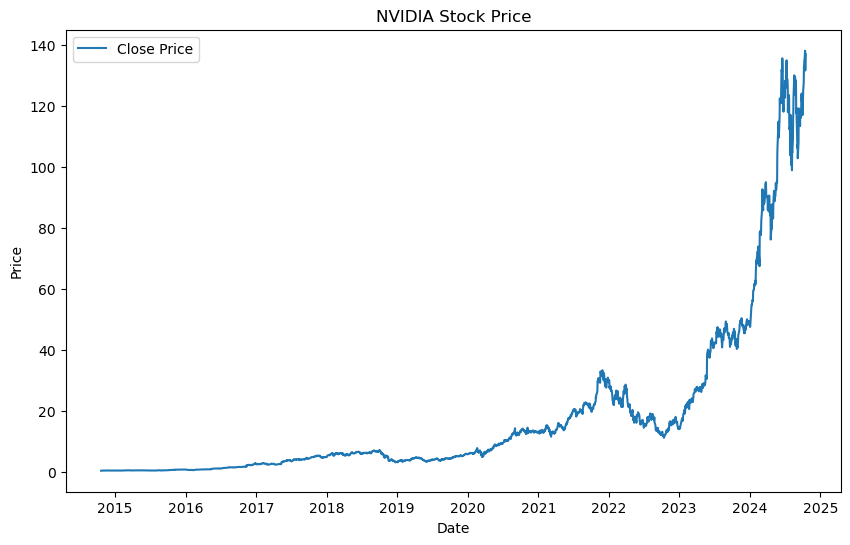

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(nvda_df['Close'], label='Close Price')
plt.title('NVIDIA Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Perform ARIMA forecasting
# ARIMA model requires the data to be in a time series format
# We'll use the 'Close' prices for time series forecasting

# Plot the historical data

# Fit the ARIMA model on the closing prices
model = ARIMA(nvidia_stock['Close'], order=(5,1,0))  # ARIMA(p,d,q)
model_fit = model.fit()

# Make a forecast
forecast = model_fit.forecast(steps=30)  # Forecast the next 30 days
print(forecast)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(nvidia_stock['Close'], label='Historical Stock Price')
plt.plot(forecast, label='Forecasted Price', color='red')
plt.title('NVIDIA Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [74]:
%pip install pmdarima

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------------------- ------ 51.2/61.0 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 806.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
   ------------- -------------------------- 204.8/613.3 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 613.3/613.3 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------------------ --- 2.5/2.8 MB 81.9 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 58.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------- ----------------------------- 4.1/15.8 MB 131.1 MB/s eta 0:00:01
   ------------------------ --------------- 9.7/15.8 MB 123.7 MB/s eta 0:00:01
   ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.26.4 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
C:\Users\visho\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\visho\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\visho\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima


stepwise_fit = auto_arima(train_data['Close'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

# Fit the ARIMA model with the best parameters
model = ARIMA(train_data['Close'], order=stepwise_fit.order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())





# Forecast future values using the ARIMA model
n_periods = 30  # Number of periods to forecast
forecast = model_fit.forecast(steps=n_periods)

# Create a range of future dates for the forecasted data
forecast_index = pd.date_range(train_data.index[-1], periods=n_periods, freq=train_data.index.freq)

# Create a new DataFrame for the forecasted data
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Visualize the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Price Forecast using ARIMA')
plt.legend()
plt.show()



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6628.101, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2393.902, Time=3.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4816.366, Time=2.47 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6632.224, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2927.930, Time=0.54 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2186.129, Time=7.38 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=15.83 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=9.43 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=6624.477, Time=2.17 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2185.387, Time=8.12 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=2395.684, Time=5.10 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=23.04 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.62 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AI

AttributeError: 'RangeIndex' object has no attribute 'freq'

## Conclusion

The ARIMA model performs well when there is clear seasonality. <br>
In cases like stock market forecasting where seasonality cannot be noticed, the model might not work as well

## References

https://www.mastersindatascience.org/learning/statistics-data-science/what-is-arima-modeling/

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp

## License

Copyright (c) 2024 Nagapriyatham Pindi, Vishodhan Krishnan
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.